<cell_type>markdown</cell_type># 01 - Exploration des Données (EDA)

**Objectif** : Comprendre les données avant de construire un modèle.

---

## Sommaire

1. [Imports et chargement des données](#1-imports-et-chargement-des-données)
2. [Premier aperçu des données](#2-premier-aperçu-des-données)
3. [Analyse des valeurs manquantes](#3-analyse-des-valeurs-manquantes) ⚠️
4. [Analyse des sites et dates](#4-analyse-des-sites-et-dates)
5. [Analyse des TARGETS](#5-analyse-des-targets-variables-à-prédire)
6. [Analyse des FEATURES](#6-analyse-des-features-variables-explicatives)
7. [Analyse des OUTLIERS](#7-analyse-des-outliers) ⚠️
   - 7.5 Conclusion sur les outliers
   - 7.6 Interprétation physique des corrélations 🔬
8. [Conclusions](#8-conclusions-de-leda)

---

## Questions à se poser :
1. Combien de lignes et colonnes ?
2. À quoi ressemblent les données ?
3. Y a-t-il des valeurs manquantes ? Où ? Pourquoi ?
4. Comment sont distribuées les variables à prédire ?
5. Quelles features sont corrélées avec les targets ?
6. Y a-t-il des outliers ? Combien ? Lesquels ?
7. **Pourquoi** observe-t-on ces corrélations ? (explication physique)

---
## 1. Imports et chargement des données

In [1]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (10, 6)

# Pour ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

print("Imports OK!")

Imports OK!


In [2]:
# Importer nos fonctions de chargement
import sys
sys.path.append('..')

from src.paths import WATER_QUALITY_FILE, LANDSAT_FILE, TERRACLIMATE_FILE
from src.paths import check_data_files
from src.data.load_data import load_all
from src.config import TARGETS, BENCHMARK_FEATURES

# Vérifier que les fichiers existent
check_data_files()

Vérification des fichiers de données:
[OK] Water Quality (training)
[OK] Landsat (training)
[OK] TerraClimate (training)
[OK] Submission Template
[OK] Landsat (submission)
[OK] TerraClimate (submission)
Tous les fichiers sont présents!


True

In [3]:
# Charger les données (SANS remplir les valeurs manquantes)
X, y, site_ids, df = load_all(
    str(WATER_QUALITY_FILE),
    str(LANDSAT_FILE),
    str(TERRACLIMATE_FILE),
    fill_na=False  # On ne remplit PAS les valeurs manquantes pour l'instant
)

CHARGEMENT DES DONNÉES
[OK] Water quality: 9319 lignes
[OK] Landsat: 9319 lignes, 13 colonnes
[OK] TerraClimate: 9319 lignes
[OK] Données fusionnées: 9319 lignes, 26 colonnes

Valeurs manquantes:

10 colonnes avec des valeurs manquantes:
  - blue: 1371 manquants (14.7%)
  - green: 814 manquants (8.7%)
  - red: 1371 manquants (14.7%)
  - nir: 814 manquants (8.7%)
  - swir16: 814 manquants (8.7%)
  - swir22: 814 manquants (8.7%)
  - NDVI: 1371 manquants (14.7%)
  - NDWI: 814 manquants (8.7%)
  - NDMI: 814 manquants (8.7%)
  - MNDWI: 814 manquants (8.7%)
[OK] 162 sites uniques identifiés
[OK] X: 9319 lignes, 11 features
[OK] y: 9319 lignes, 3 targets

PRÊT!


---
## 2. Premier aperçu des données

In [4]:
# Dimensions du dataset
print(f"Nombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"\nColonnes : {list(df.columns)}")

Nombre de lignes : 9319
Nombre de colonnes : 26

Colonnes : ['Latitude', 'Longitude', 'Sample Date', 'Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus', 'blue', 'green', 'red', 'nir', 'swir16', 'swir22', 'NDVI', 'NDWI', 'NDMI', 'MNDWI', 'pet', 'aet', 'ppt', 'tmax', 'tmin', 'soil', 'def', 'pdsi', 'vpd', 'ws']


In [5]:
# Afficher les premières lignes
df.head()

,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,blue,green,red,nir,...,pet,aet,ppt,tmax,tmin,soil,def,pdsi,vpd,ws
0,-28.760833,17.730278,2011-01-02,128.912,555.0,10.0,9557.0,11426.0,12802.0,11190.0,...,236.30000,7.90000,8.3,35.760000,21.029999,0.000000,228.40001,-1.16,2.82,2.94
1,-26.861111,28.884722,2011-01-03,74.720,162.9,163.0,8569.0,9550.0,9083.5,17658.5,...,134.30000,134.30000,175.0,25.410000,14.099999,35.700000,0.00000,1.54,0.80,1.93
2,-26.450000,28.085833,2011-01-03,89.254,573.0,80.0,9502.5,10720.0,12540.0,15210.0,...,141.50000,141.50000,156.1,26.070000,15.250000,9.900001,0.00000,-0.62,0.93,2.15
3,-27.671111,27.236944,2011-01-03,82.000,203.6,101.0,9430.5,10943.0,10794.0,14887.0,...,152.40001,152.40001,194.7,27.599998,15.960000,28.200000,0.00000,3.08,1.18,2.22
4,-27.356667,27.286389,2011-01-03,56.100,145.1,151.0,8815.5,9502.5,9404.5,16828.5,...,151.90001,151.90001,180.4,27.210000,16.150000,21.300001,0.00000,2.69,1.12,2.27


In [6]:
# Types de données
df.dtypes

Latitude                                float64
Longitude                               float64
Sample Date                      datetime64[ns]
Total Alkalinity                        float64
Electrical Conductance                  float64
Dissolved Reactive Phosphorus           float64
blue                                    float64
green                                   float64
red                                     float64
nir                                     float64
swir16                                  float64
swir22                                  float64
NDVI                                    float64
NDWI                                    float64
NDMI                                    float64
MNDWI                                   float64
pet                                     float64
aet                                     float64
ppt                                     float64
tmax                                    float64
tmin                                    

In [7]:
# Statistiques de base
df.describe()

,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,blue,green,red,nir,...,pet,aet,ppt,tmax,tmin,soil,def,pdsi,vpd,ws
count,9319.000000,9319.000000,9319,9319.000000,9319.000000,9319.000000,7948.000000,8505.000000,7948.000000,8505.000000,...,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000
mean,-28.474988,26.868414,2013-08-06 06:31:33.679579392,119.108208,485.004146,43.525338,9187.883115,10047.628042,10499.351220,14112.932334,...,124.749814,39.469214,41.891383,26.065189,10.383538,7.958343,85.280600,-1.236518,1.149991,2.577950
min,-34.405833,17.730278,2011-01-02 00:00:00,4.800000,15.120000,5.000000,3629.000000,4045.000000,3709.000000,3992.000000,...,42.100002,0.000000,0.000000,12.219999,-3.610000,0.000000,0.000000,-6.080000,0.330000,0.840000
25%,-30.160091,26.126667,2012-06-07 00:00:00,55.811000,207.050000,10.000000,8490.000000,9368.500000,9394.875000,12723.000000,...,86.900000,8.300000,7.300000,23.000000,6.240000,1.000000,52.700000,-2.920000,0.860000,2.090000
50%,-28.058889,27.409060,2013-08-28 00:00:00,113.300000,402.000000,20.000000,8873.000000,9800.500000,10127.500000,14187.000000,...,122.900000,29.400000,28.400000,26.490000,11.120000,3.100000,82.700005,-2.020000,1.080000,2.500000
75%,-26.861111,29.245556,2014-10-15 00:00:00,170.230000,693.000000,48.000000,9272.000000,10296.000000,11017.500000,15543.000000,...,155.900010,58.100002,59.900000,29.289999,14.794999,8.500000,117.700005,-0.290000,1.370000,3.040000
max,-22.225556,32.325000,2015-12-31 00:00:00,361.676000,1506.000000,195.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,270.800020,173.400010,374.500000,38.120000,22.980000,162.200000,267.200000,8.190000,3.190000,5.500000
std,2.760282,3.535164,NaN,74.692591,341.937736,50.980194,3196.549754,2995.887852,3183.746595,3142.858572,...,42.671664,37.708218,44.910284,4.393700,5.603319,13.659365,50.523111,2.466472,0.404431,0.668358


---
## 3. Analyse des valeurs manquantes

**Pourquoi c'est important ?**
- Les valeurs manquantes peuvent fausser le modèle
- Il faut comprendre POURQUOI elles manquent avant de décider comment les traiter

**Questions à se poser :**
1. Quelles colonnes ont des valeurs manquantes ?
2. Quel pourcentage de données manque ?
3. Y a-t-il un pattern ? (certains sites ? certaines dates ?)
4. Comment les traiter ? (supprimer ? remplir ? avec quelle valeur ?)

In [8]:
# 3.1 Compter les valeurs manquantes par colonne
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)

# Créer un tableau récapitulatif
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquants': missing.values,
    'Pourcentage': missing_pct.values.round(2)
})
missing_df = missing_df.sort_values('Manquants', ascending=False)

print(f"Résumé des valeurs manquantes :")
print(f"- Total de lignes : {len(df)}")
print(f"- Colonnes avec des manquants : {(missing > 0).sum()} / {len(df.columns)}")
print()
print(missing_df.to_string(index=False))

Résumé des valeurs manquantes :
- Total de lignes : 9319
- Colonnes avec des manquants : 10 / 26

                      Colonne  Manquants  Pourcentage
                         blue       1371        14.71
                          red       1371        14.71
                         NDVI       1371        14.71
                          nir        814         8.73
                        MNDWI        814         8.73
                        green        814         8.73
                         NDWI        814         8.73
                       swir22        814         8.73
                       swir16        814         8.73
                         NDMI        814         8.73
                  Sample Date          0         0.00
             Total Alkalinity          0         0.00
       Electrical Conductance          0         0.00
Dissolved Reactive Phosphorus          0         0.00
                     Latitude          0         0.00
                    Longitude         

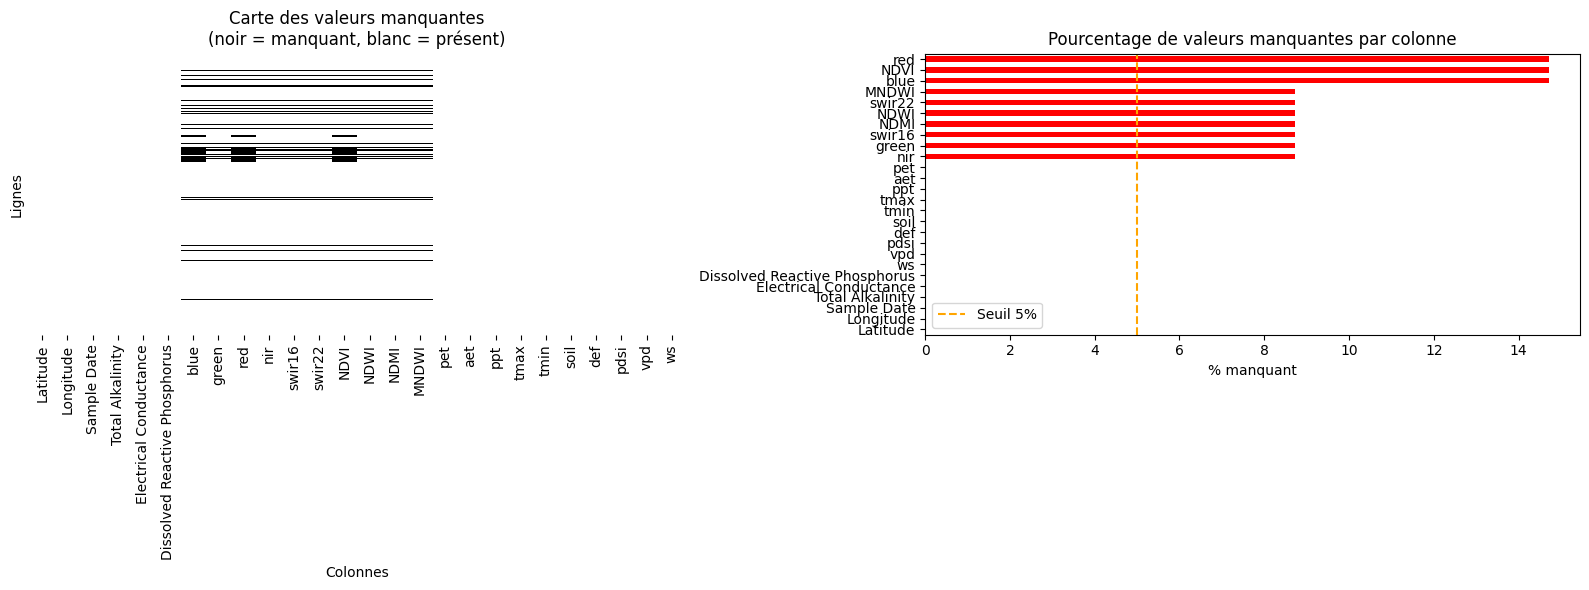


Légende :
- Vert : aucune valeur manquante
- Rouge : colonnes avec des valeurs manquantes
- Ligne orange : seuil de 5% (au-delà, peut poser problème)


In [9]:
# 3.2 Visualisation globale des valeurs manquantes

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Heatmap (vue d'ensemble)
ax1 = axes[0]
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, ax=ax1, cmap='binary')
ax1.set_title('Carte des valeurs manquantes\n(noir = manquant, blanc = présent)')
ax1.set_xlabel('Colonnes')
ax1.set_ylabel('Lignes')

# Graphique 2 : Barplot par colonne
ax2 = axes[1]
missing_pct_sorted = missing_pct.sort_values(ascending=True)
colors = ['red' if x > 0 else 'green' for x in missing_pct_sorted]
missing_pct_sorted.plot(kind='barh', ax=ax2, color=colors)
ax2.set_title('Pourcentage de valeurs manquantes par colonne')
ax2.set_xlabel('% manquant')
ax2.axvline(x=5, color='orange', linestyle='--', label='Seuil 5%')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nLégende :")
print("- Vert : aucune valeur manquante")
print("- Rouge : colonnes avec des valeurs manquantes")
print("- Ligne orange : seuil de 5% (au-delà, peut poser problème)")

In [10]:
# 3.3 Analyser les lignes avec des valeurs manquantes

# Combien de lignes ont au moins une valeur manquante ?
lignes_avec_na = df.isnull().any(axis=1).sum()
print(f"Lignes avec au moins 1 valeur manquante : {lignes_avec_na} ({100*lignes_avec_na/len(df):.1f}%)")

# Combien de lignes sont complètes ?
lignes_completes = len(df) - lignes_avec_na
print(f"Lignes complètes (sans aucun manquant) : {lignes_completes} ({100*lignes_completes/len(df):.1f}%)")

Lignes avec au moins 1 valeur manquante : 1371 (14.7%)
Lignes complètes (sans aucun manquant) : 7948 (85.3%)


In [11]:
# 3.4 Y a-t-il un pattern dans les valeurs manquantes ?

# Les valeurs manquantes sont-elles liées à certains sites ?
if df.isnull().any().any():  # S'il y a des valeurs manquantes
    df_temp = df.copy()
    df_temp['site_id'] = site_ids
    df_temp['has_missing'] = df.isnull().any(axis=1)
    
    sites_avec_na = df_temp.groupby('site_id')['has_missing'].mean() * 100
    sites_avec_na = sites_avec_na[sites_avec_na > 0].sort_values(ascending=False)
    
    if len(sites_avec_na) > 0:
        print(f"Sites avec des valeurs manquantes : {len(sites_avec_na)}")
        print(f"\nTop 10 sites les plus affectés (% de lignes avec manquants) :")
        print(sites_avec_na.head(10).to_string())
    else:
        print("Aucun pattern par site détecté.")
else:
    print("Aucune valeur manquante dans le dataset !")

Sites avec des valeurs manquantes : 147

Top 10 sites les plus affectés (% de lignes avec manquants) :
site_id
-28.9636_19.1549    54.285714
-29.7589_30.9353    38.461538
-26.0064_29.2539    36.363636
-31.8603_18.6875    34.375000
-24.3962_27.0898    33.898305
-28.7681_20.7206    32.432432
-28.7608_17.7303    32.258065
-23.7631_27.9086    31.578947
-29.1825_23.5756    31.578947
-24.9253_29.3244    31.250000


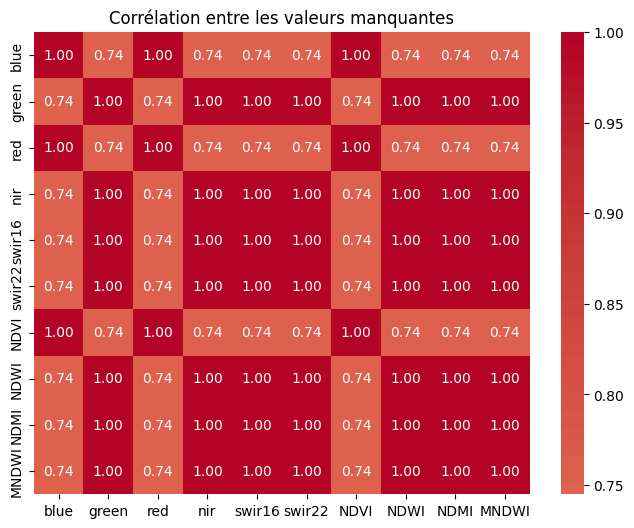


Interprétation :
- Corrélation proche de 1 : les colonnes ont tendance à être manquantes ensemble
- Corrélation proche de 0 : pas de lien entre les valeurs manquantes


In [12]:
# 3.5 Corrélation entre les valeurs manquantes
# Est-ce que quand une colonne est manquante, une autre l'est aussi ?

cols_with_na = df.columns[df.isnull().any()].tolist()

if len(cols_with_na) > 1:
    missing_corr = df[cols_with_na].isnull().corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Corrélation entre les valeurs manquantes')
    plt.show()
    
    print("\nInterprétation :")
    print("- Corrélation proche de 1 : les colonnes ont tendance à être manquantes ensemble")
    print("- Corrélation proche de 0 : pas de lien entre les valeurs manquantes")
elif len(cols_with_na) == 1:
    print(f"Une seule colonne avec des valeurs manquantes : {cols_with_na[0]}")
else:
    print("Aucune valeur manquante à analyser.")

### 3.6 Décision : Comment traiter les valeurs manquantes ?

**Options possibles :**

| Option | Quand l'utiliser | Avantages | Inconvénients |
|--------|------------------|-----------|---------------|
| **Supprimer les lignes** | Peu de lignes concernées (<15%) | Simple, pas de biais | Perte de données |
| **Supprimer les colonnes** | Colonne avec >50% de manquants | Évite le bruit | Perte d'information |
| **Remplir par la médiane** | Valeurs manquantes aléatoires | Robuste aux outliers | Peut réduire la variance |
| **Remplir par la moyenne** | Distribution normale | Simple | Sensible aux outliers |
| **Remplir par interpolation** | Données temporelles | Préserve les tendances | Peut créer des valeurs irréalistes |

### 3.7 Notre décision : Ignorer pour l'instant, récupérer plus tard

**Constat :** ~14.7% des lignes ont des valeurs manquantes.

**Décision :** On supprime ces lignes pour l'instant.

**Pourquoi ?**
- 85.3% de données complètes = ~8à00 lignes → suffisant pour entraîner un modèle
- Mieux vaut un modèle sur des données fiables que sur des données "inventées"
- On évite d'introduire du biais en remplissant avec des valeurs artificielles

**Pourquoi les données manquent ?**
- **Landsat** : nuages qui cachent le satellite → pas d'image ce jour-là
- **TerraClimate** : données climatiques non disponibles pour cette période

**TODO pour plus tard :** Essayer de récupérer les données manquantes :
1. Chercher une image satellite à une date proche (±7 jours)
2. Interpoler entre les mesures avant/après
3. Utiliser une autre source (ex: Sentinel-2)

In [13]:
# 3.7 Créer un DataFrame sans valeurs manquantes

df_clean = df.dropna()

print("Résultat après suppression des lignes avec valeurs manquantes :")
print(f"  - Avant : {len(df)} lignes")
print(f"  - Après : {len(df_clean)} lignes")
print(f"  - Conservé : {100*len(df_clean)/len(df):.1f}%")
print(f"\nOn travaillera avec df_clean pour la suite du projet.")

Résultat après suppression des lignes avec valeurs manquantes :
  - Avant : 9319 lignes
  - Après : 7948 lignes
  - Conservé : 85.3%

On travaillera avec df_clean pour la suite du projet.


---
## 4. Analyse des sites et dates

In [14]:
# Combien de sites uniques ?
n_sites = site_ids.nunique()
print(f"Nombre de sites uniques : {n_sites}")

# Combien d'observations par site en moyenne ?
obs_par_site = site_ids.value_counts()
print(f"\nObservations par site :")
print(f"  - Minimum : {obs_par_site.min()}")
print(f"  - Maximum : {obs_par_site.max()}")
print(f"  - Moyenne : {obs_par_site.mean():.1f}")

Nombre de sites uniques : 162

Observations par site :
  - Minimum : 6
  - Maximum : 210
  - Moyenne : 57.5


In [15]:
# Période temporelle
print(f"Date min : {df['Sample Date'].min()}")
print(f"Date max : {df['Sample Date'].max()}")

Date min : 2011-01-02 00:00:00
Date max : 2015-12-31 00:00:00


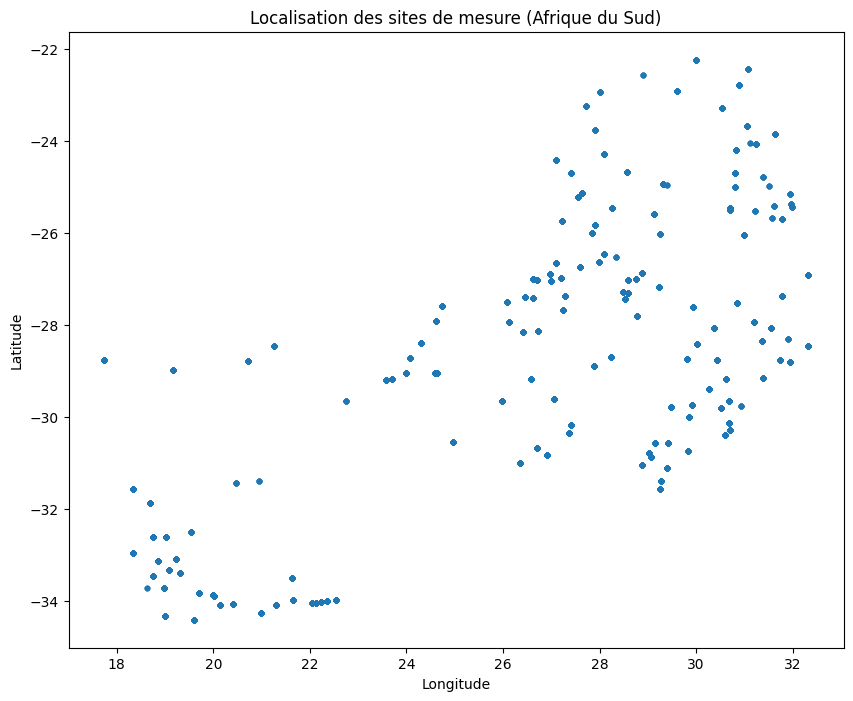

In [16]:
# Carte des sites (scatter plot simple)
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Localisation des sites de mesure (Afrique du Sud)')
plt.show()

---
## 5. Analyse des TARGETS (variables à prédire)

In [17]:
# Rappel : les 3 targets
print("Variables à prédire :")
for t in TARGETS:
    print(f"  - {t}")

Variables à prédire :
  - Total Alkalinity
  - Electrical Conductance
  - Dissolved Reactive Phosphorus


In [18]:
# Statistiques des targets
df[TARGETS].describe()

,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
count,9319.000000,9319.000000,9319.000000
mean,119.108208,485.004146,43.525338
std,74.692591,341.937736,50.980194
min,4.800000,15.120000,5.000000
25%,55.811000,207.050000,10.000000
50%,113.300000,402.000000,20.000000
75%,170.230000,693.000000,48.000000
max,361.676000,1506.000000,195.000000


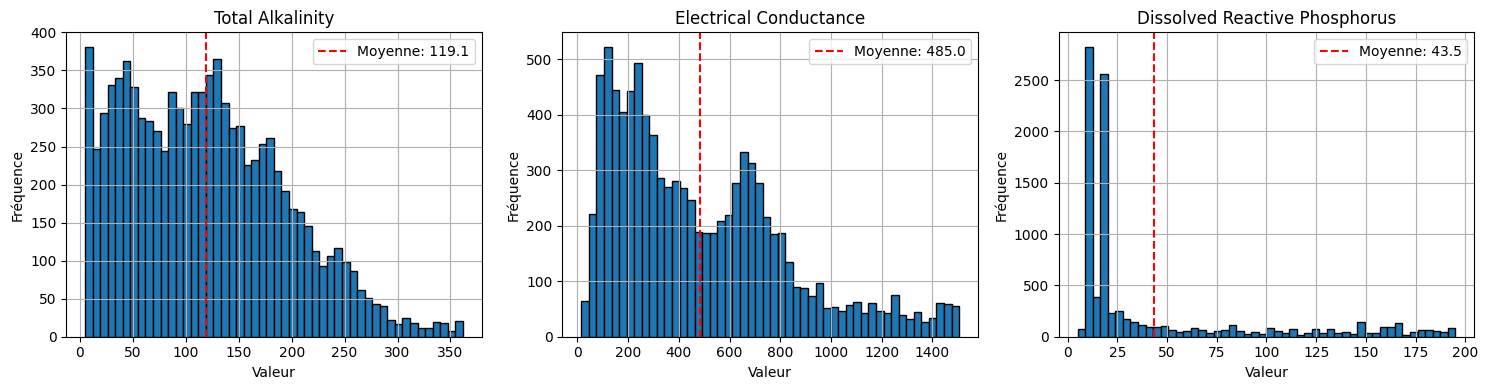

In [19]:
# Distribution des targets (histogrammes)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    df[target].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(target)
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')
    
    # Ajouter la moyenne
    mean_val = df[target].mean()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.1f}')
    ax.legend()

plt.tight_layout()
plt.show()

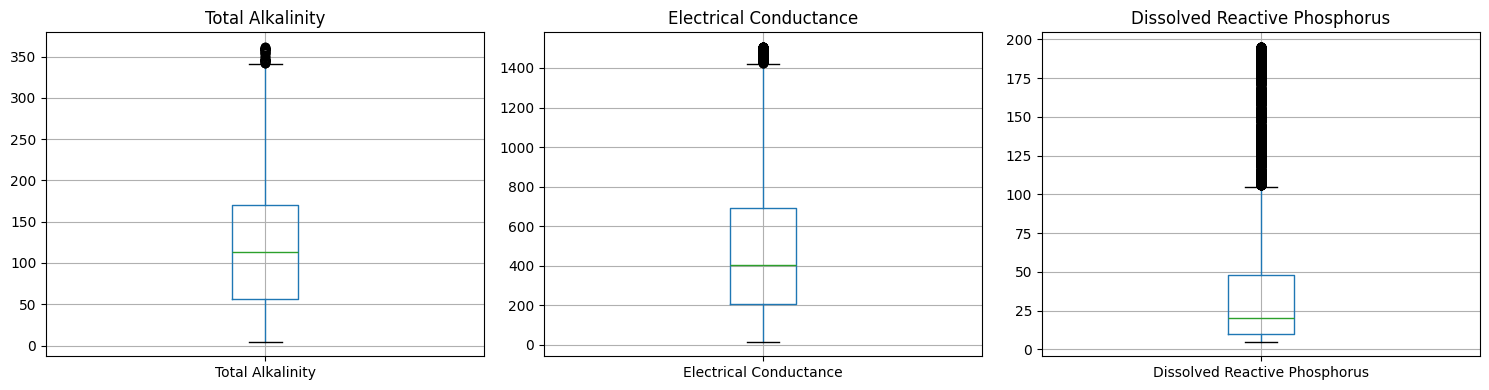

Les points au-dessus/en-dessous des 'moustaches' sont des outliers potentiels.


In [20]:
# Boxplots des targets (pour voir les outliers)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    df.boxplot(column=target, ax=ax)
    ax.set_title(target)

plt.tight_layout()
plt.show()

print("Les points au-dessus/en-dessous des 'moustaches' sont des outliers potentiels.")

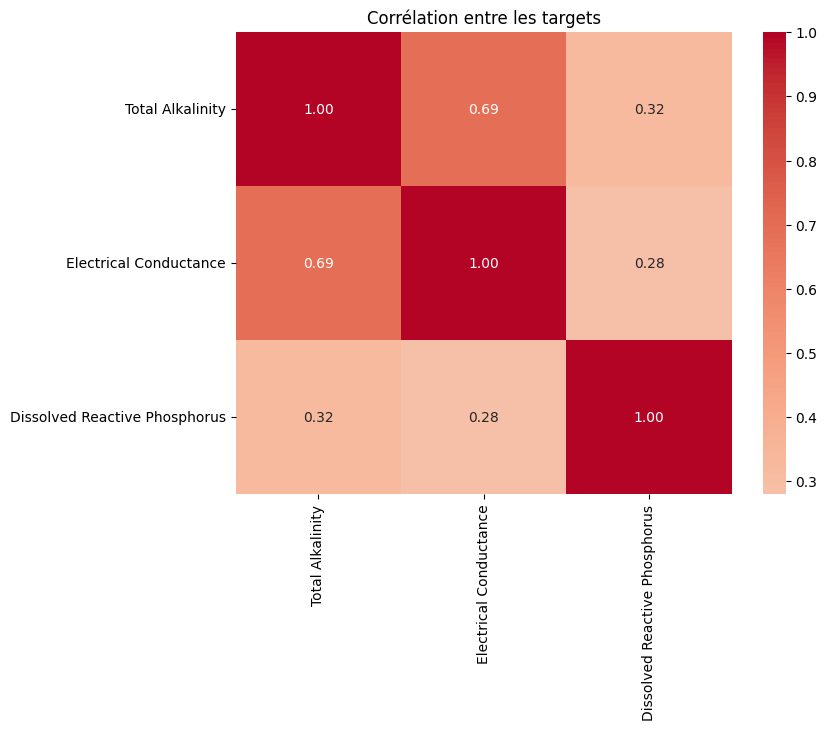


Interprétation :
- Corrélation proche de 1 : les variables évoluent ensemble
- Corrélation proche de 0 : pas de relation linéaire
- Corrélation négative : relation inverse


In [21]:
# Corrélation entre les targets
plt.figure(figsize=(8, 6))
corr_targets = df[TARGETS].corr()
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre les targets')
plt.show()

print("\nInterprétation :")
print("- Corrélation proche de 1 : les variables évoluent ensemble")
print("- Corrélation proche de 0 : pas de relation linéaire")
print("- Corrélation négative : relation inverse")

---
## 6. Analyse des FEATURES (variables explicatives)

In [22]:
# Features du benchmark
print("Features utilisées dans le benchmark :")
for f in BENCHMARK_FEATURES:
    print(f"  - {f}")

Features utilisées dans le benchmark :
  - blue
  - green
  - red
  - nir
  - swir16
  - swir22
  - NDVI
  - NDWI
  - NDMI
  - MNDWI
  - pet


In [23]:
# Statistiques des features
df[BENCHMARK_FEATURES].describe()

,blue,green,red,nir,swir16,swir22,NDVI,NDWI,NDMI,MNDWI,pet
count,7948.000000,8505.000000,7948.000000,8505.000000,8505.000000,8505.000000,7948.000000,8505.000000,8505.000000,8505.000000,9319.000000
mean,9187.883115,10047.628042,10499.351220,14112.932334,13595.870076,11445.992299,0.145080,-0.164954,0.022427,-0.143005,124.749814
std,3196.549754,2995.887852,3183.746595,3142.858572,3443.465493,2608.052462,0.098666,0.087502,0.077769,0.097920,42.671664
min,3629.000000,4045.000000,3709.000000,3992.000000,3672.500000,3634.000000,-0.427291,-0.456681,-0.328293,-0.300487,42.100002
25%,8490.000000,9368.500000,9394.875000,12723.000000,11757.000000,9819.500000,0.090555,-0.216709,-0.034943,-0.210437,86.900000
50%,8873.000000,9800.500000,10127.500000,14187.000000,13707.000000,11260.000000,0.143882,-0.173015,0.022827,-0.166812,122.900000
75%,9272.000000,10296.000000,11017.500000,15543.000000,15440.000000,12907.000000,0.206766,-0.127038,0.074135,-0.102780,155.900010
max,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,31202.500000,0.468367,0.377415,0.567905,0.590974,270.800020


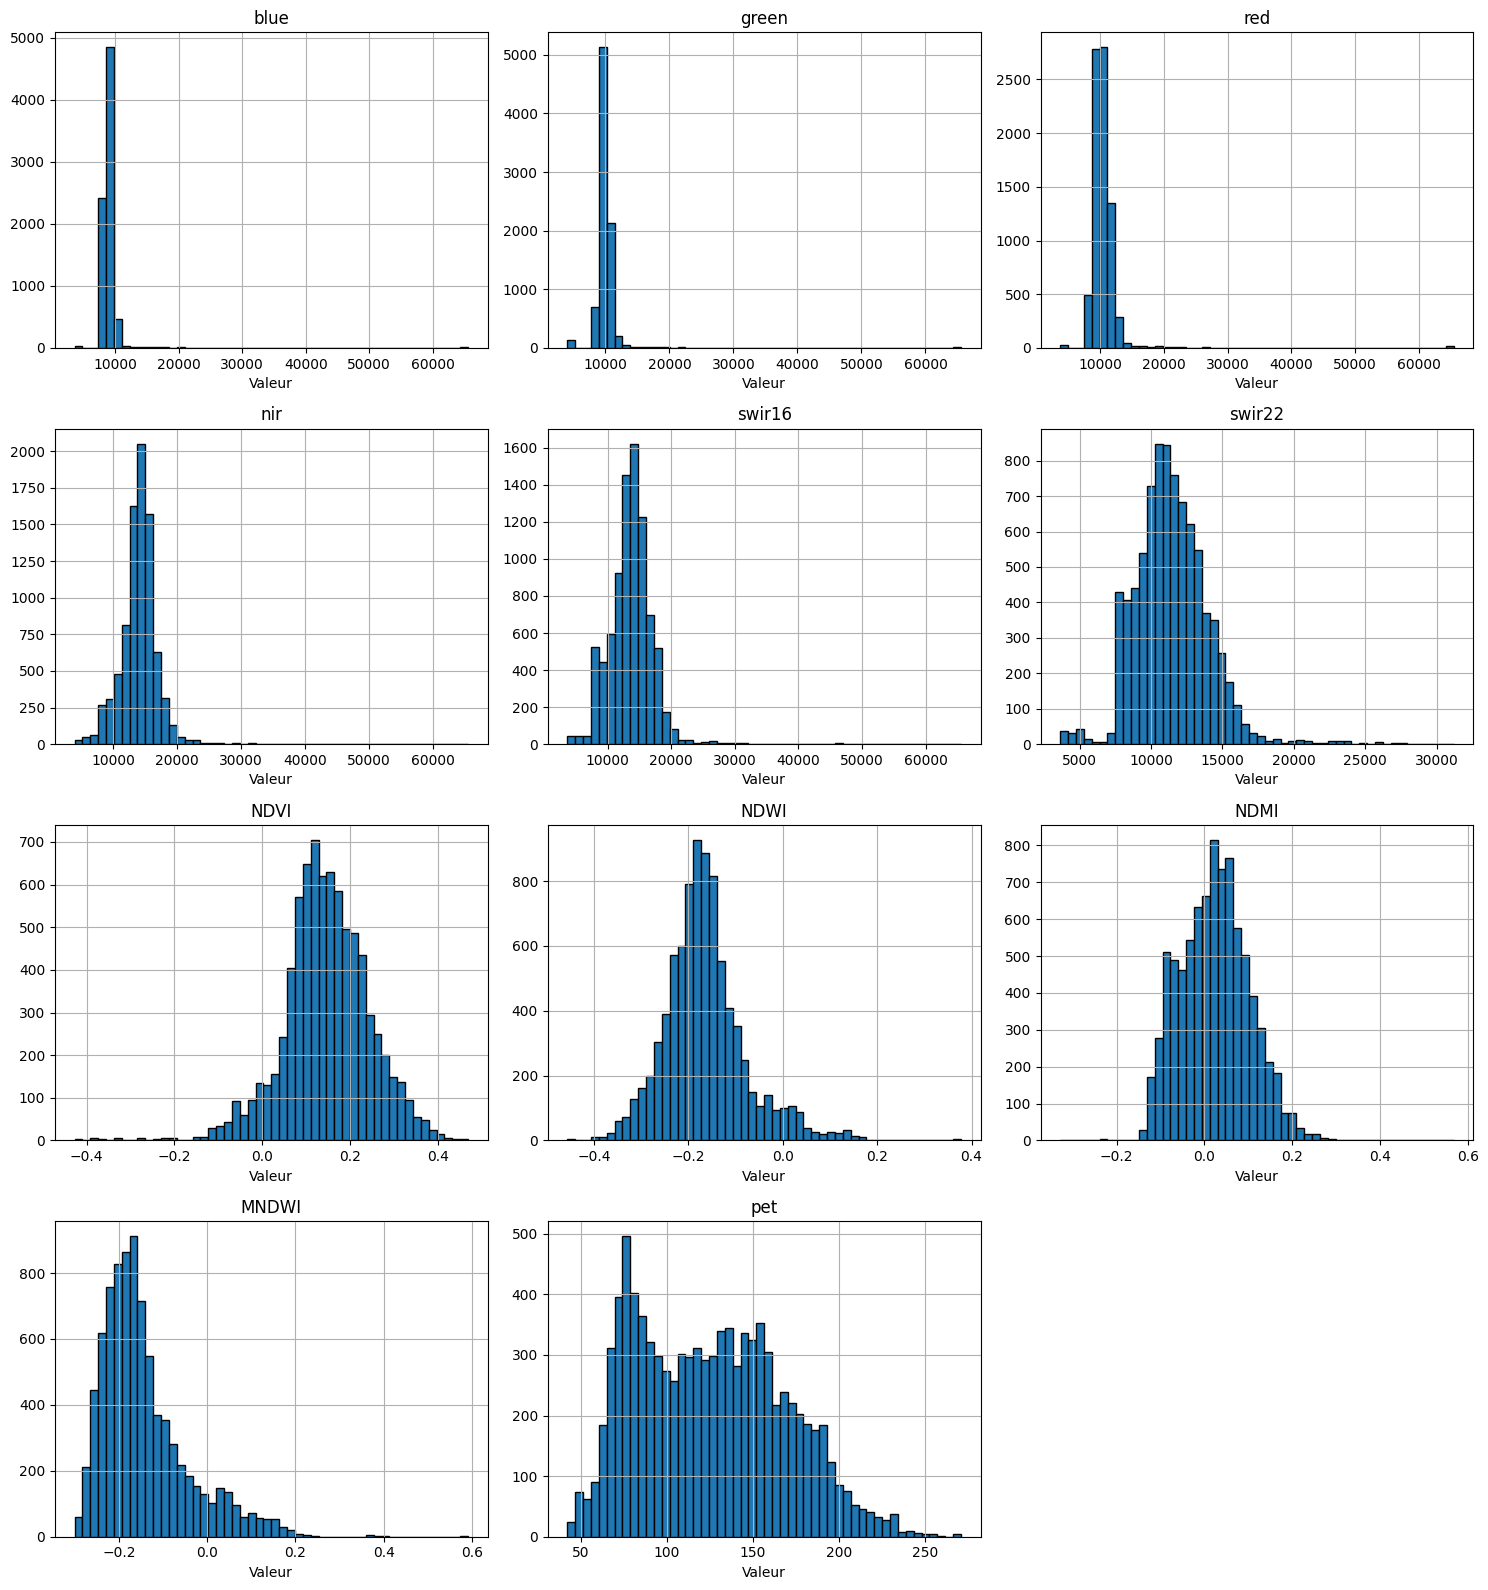

In [24]:
# Distribution des features
n_features = len(BENCHMARK_FEATURES)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Arrondi supérieur

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(BENCHMARK_FEATURES):
    ax = axes[i]
    df[feature].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Valeur')

# Cacher les axes vides (si nombre de features pas multiple de n_cols)
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

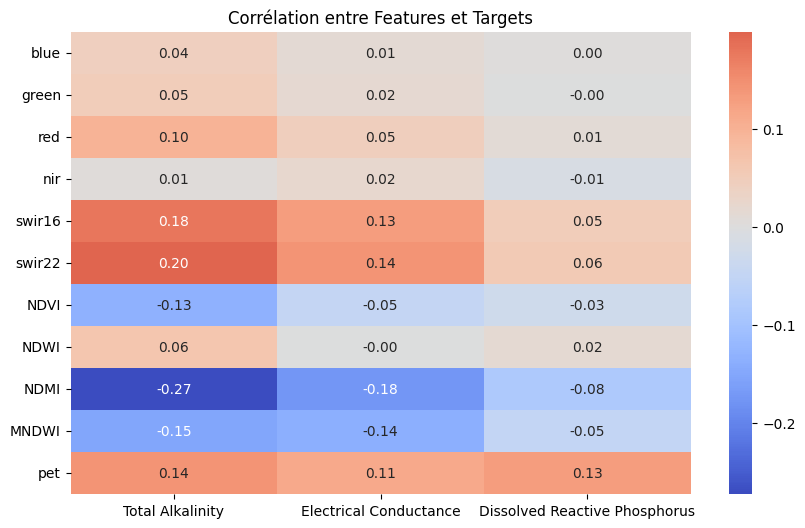


Plus la valeur est proche de 1 ou -1, plus la feature est utile pour prédire.


In [25]:
# Corrélation features vs targets
# C'est important pour savoir quelles features sont utiles!

corr_features_targets = df[BENCHMARK_FEATURES + TARGETS].corr()

# Garder seulement les corrélations features vs targets
corr_subset = corr_features_targets.loc[BENCHMARK_FEATURES, TARGETS]

plt.figure(figsize=(10, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre Features et Targets')
plt.show()

print("\nPlus la valeur est proche de 1 ou -1, plus la feature est utile pour prédire.")

---
## 7. Analyse des OUTLIERS

**Qu'est-ce qu'un outlier ?**
Une valeur anormalement éloignée des autres. Peut être :
- Une erreur de mesure (à corriger)
- Une vraie valeur extrême (à garder)

**Méthode utilisée : IQR (Interquartile Range)**
```
Q1 = 25e percentile
Q3 = 75e percentile
IQR = Q3 - Q1

Outlier si : valeur < Q1 - 1.5×IQR  ou  valeur > Q3 + 1.5×IQR
```

C'est ce que montrent les **boxplots** : les points au-delà des "moustaches" sont les outliers.

In [26]:
# 7.1 Importer la fonction de détection des outliers
from src.data.load_data import detect_outliers_iqr, get_outliers_summary

print("Fonctions importées depuis src/data/load_data.py!")

Fonctions importées depuis src/data/load_data.py!


In [27]:
# 7.2 Outliers dans les TARGETS

print("=== OUTLIERS DANS LES TARGETS ===\n")

results_targets = {}
for target in TARGETS:
    result = detect_outliers_iqr(df[target])
    results_targets[target] = result
    
    # Verdict
    if result['pct'] > 10:
        verdict = "BEAUCOUP d'outliers!"
    elif result['pct'] > 5:
        verdict = "Nombre modere"
    else:
        verdict = "Acceptable"
    
    print(f"{target}:")
    print(f"  Plage normale: {result['lower_bound']:.1f} a {result['upper_bound']:.1f}")
    print(f"  Outliers: {result['total']} ({result['pct']:.1f}%) -> {verdict}")
    print()

=== OUTLIERS DANS LES TARGETS ===

Total Alkalinity:
  Plage normale: -115.8 a 341.9
  Outliers: 43 (0.5%) -> Acceptable

Electrical Conductance:
  Plage normale: -521.9 a 1421.9
  Outliers: 169 (1.8%) -> Acceptable

Dissolved Reactive Phosphorus:
  Plage normale: -47.0 a 105.0
  Outliers: 1398 (15.0%) -> BEAUCOUP d'outliers!



In [28]:
# 7.3 Outliers dans les FEATURES

print("=== OUTLIERS DANS LES FEATURES ===\n")

results_features = {}
for feature in BENCHMARK_FEATURES:
    data = df[feature].dropna()
    result = detect_outliers_iqr(data)
    results_features[feature] = result
    
    print(f"{feature}: {result['total']} outliers ({result['pct']:.1f}%)")

=== OUTLIERS DANS LES FEATURES ===

blue: 292 outliers (3.7%)
green: 471 outliers (5.5%)
red: 247 outliers (3.1%)
nir: 519 outliers (6.1%)
swir16: 204 outliers (2.4%)
swir22: 240 outliers (2.8%)
NDVI: 181 outliers (2.3%)
NDWI: 481 outliers (5.7%)
NDMI: 43 outliers (0.5%)
MNDWI: 454 outliers (5.3%)
pet: 5 outliers (0.1%)


### 7.5 Stratégie pour le Dataset Landsat

#### État actuel

| Métrique | Valeur |
|----------|--------|
| Lignes totales | 9319 |
| Lignes avec données Landsat | 8234 (88.4%) |
| Lignes sans données Landsat | 1085 (11.6%) |
| Valeurs saturées à traiter | 13 lignes (0.14%) |

**Variables extraites :** `nir`, `green`, `swir16`, `swir22`, `NDMI`, `MNDWI`

#### Analyse des données manquantes

Les données manquantes ne sont **PAS aléatoires** :
- **Par année** : Plus de manquants en 2011-2012 (16-20%) qu'en 2013-2015 (7-8%)
- **Par saison** : Plus de manquants en été austral (Nov-Jan : 13-15%) → saison des nuages
- **Par site** : Certains sites côtiers/montagneux ont jusqu'à 45% de manquants

#### Options stratégiques

| Option | Description | Avantages | Inconvénients |
|--------|-------------|-----------|---------------|
| **A) Garder l'existant** | Utiliser les 88.4% de données disponibles | Simple, rapide | Perte de 11.6% des données |
| **B) Combler les trous** | Relancer l'extraction avec seuil nuages plus élevé (20-30%) | Récupère des données | Qualité potentiellement moindre |
| **C) Ajouter des variables** | Extraire `blue`, `red`, `NDVI`, `NDWI` pour tout le dataset | Plus de features | Temps d'extraction long |
| **D) Combinaison B+C** | Combler + nouvelles variables | Maximum de données | Le plus long |

#### Recommandation : Option A (Garder l'existant)

**Pourquoi ?**

1. **88.4% de couverture est excellent** pour des données satellite
2. **Risque de bruit** : Augmenter le seuil de nuages introduit des pixels de mauvaise qualité
3. **Variables actuelles suffisantes** : Les corrélations avec les targets sont déjà faibles (~0.1-0.3)
4. **Rapport coût/bénéfice** : Plusieurs heures d'extraction pour un gain marginal

**Actions recommandées :**

```
1. Supprimer les 13 lignes avec valeurs saturées (65535)
2. Utiliser les 8221 lignes restantes pour l'entraînement
3. Gérer les 1085 lignes manquantes :
   - Option 1 : Les supprimer (simple)
   - Option 2 : Imputer par la médiane du site (si le site a d'autres mesures)
4. Plus tard : Si le modèle ne performe pas bien, envisager Option C
```

#### Variables additionnelles potentielles (pour plus tard)

Si besoin d'améliorer le modèle, ces variables pourraient être utiles :

| Variable | Formule | Utilité pour la qualité de l'eau |
|----------|---------|----------------------------------|
| **NDVI** | (NIR-Red)/(NIR+Red) | Végétation environnante (source de nutriments) |
| **NDWI** | (Green-NIR)/(Green+NIR) | Détection des surfaces d'eau |
| **blue** | Bande bleue | Pénètre l'eau profonde, turbidité |
| **red** | Bande rouge | Chlorophylle, algues |
| **BSI** | (SWIR+Red-NIR-Blue)/(SWIR+Red+NIR+Blue) | Sol nu (érosion → sédiments) |

=== ANALYSE DES VALEURS SATURÉES LANDSAT ===

1. Valeurs saturées (= 65535) par bande :
--------------------------------------------------
  nir: 2 valeurs saturées (0.024%)
  green: 14 valeurs saturées (0.165%)
  swir16: 3 valeurs saturées (0.035%)
  swir22: aucune valeur saturée

2. Lignes avec au moins une bande saturée : 14 (0.15%)


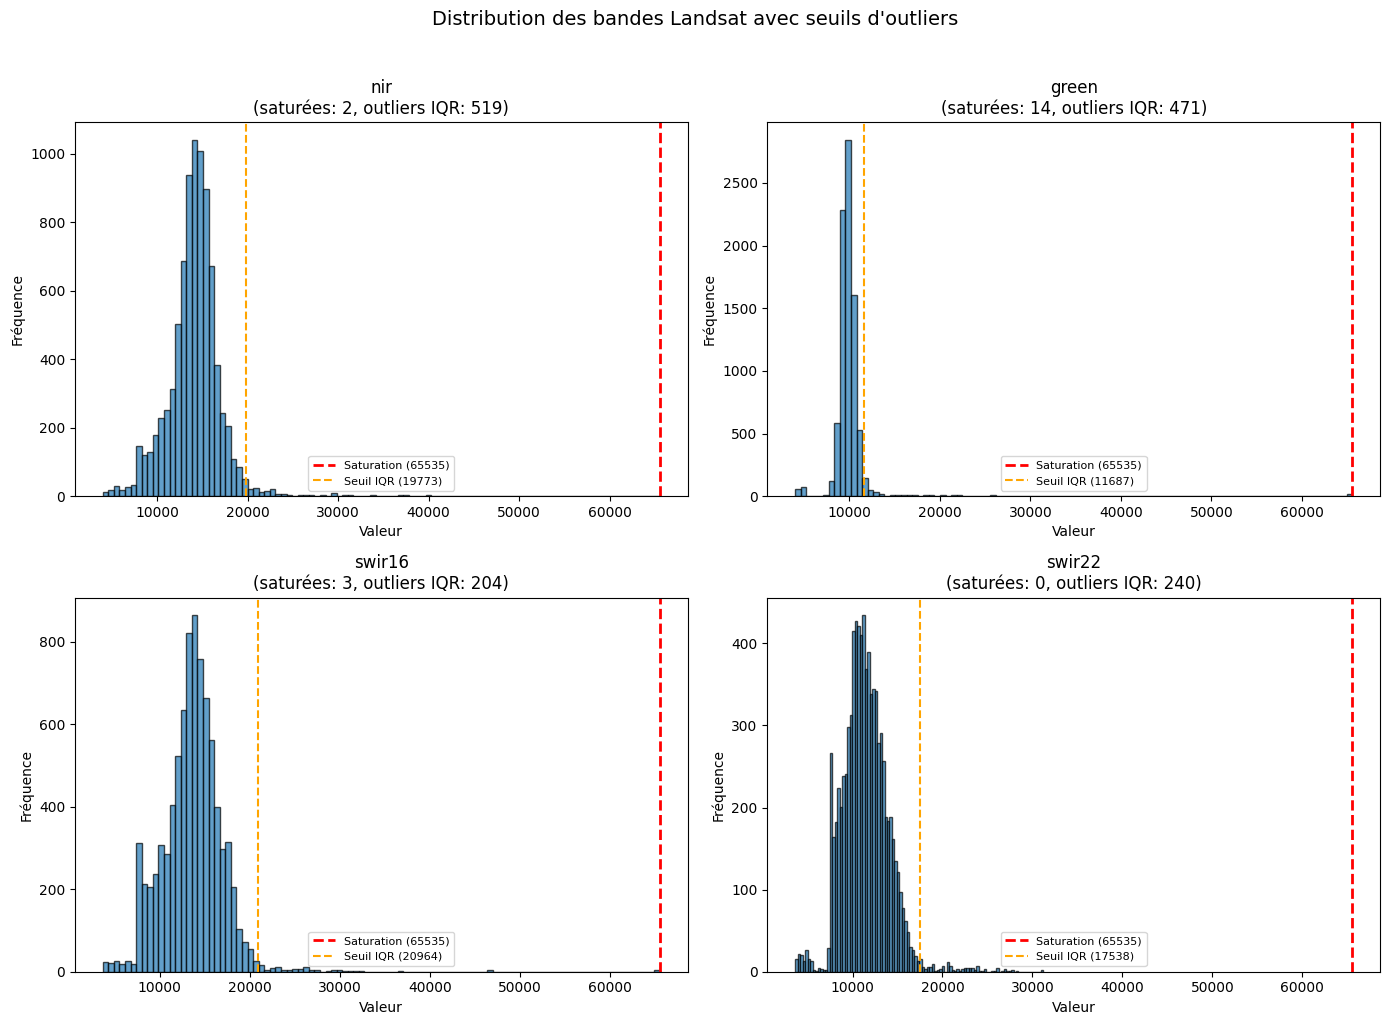


3. RECOMMANDATION :
--------------------------------------------------
   → Seulement 14 lignes concernées (0.15%)
   → SUPPRIMER ces lignes (impact négligeable sur le dataset)


In [29]:
# 7.4 Analyse des valeurs saturées Landsat

landsat_bands = ['nir', 'green', 'swir16', 'swir22']
SATURATION_VALUE = 65535

print("=== ANALYSE DES VALEURS SATURÉES LANDSAT ===\n")

# 1. Compter les valeurs saturées par bande
print("1. Valeurs saturées (= 65535) par bande :")
print("-" * 50)
saturated_counts = {}
for band in landsat_bands:
    count = (df[band] == SATURATION_VALUE).sum()
    pct = count / df[band].notna().sum() * 100
    saturated_counts[band] = count
    if count > 0:
        print(f"  {band}: {count} valeurs saturées ({pct:.3f}%)")
    else:
        print(f"  {band}: aucune valeur saturée")

# 2. Lignes avec au moins une valeur saturée
mask_saturated = (df[landsat_bands] == SATURATION_VALUE).any(axis=1)
n_saturated_rows = mask_saturated.sum()
print(f"\n2. Lignes avec au moins une bande saturée : {n_saturated_rows} ({n_saturated_rows/len(df)*100:.2f}%)")

# 3. Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, band in enumerate(landsat_bands):
    ax = axes[i]
    data = df[band].dropna()
    
    # Histogramme avec échelle log pour voir les extrêmes
    ax.hist(data, bins=100, edgecolor='black', alpha=0.7)
    
    # Ligne rouge pour la saturation
    ax.axvline(SATURATION_VALUE, color='red', linestyle='--', linewidth=2, label=f'Saturation ({SATURATION_VALUE})')
    
    # Seuil IQR
    result = detect_outliers_iqr(data)
    ax.axvline(result['upper_bound'], color='orange', linestyle='--', linewidth=1.5, label=f'Seuil IQR ({result["upper_bound"]:.0f})')
    
    ax.set_title(f"{band}\n(saturées: {saturated_counts[band]}, outliers IQR: {result['total']})")
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')
    ax.legend(fontsize=8)

plt.suptitle("Distribution des bandes Landsat avec seuils d'outliers", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# 4. Recommandation
print("\n3. RECOMMANDATION :")
print("-" * 50)
if n_saturated_rows < 20:
    print(f"   → Seulement {n_saturated_rows} lignes concernées ({n_saturated_rows/len(df)*100:.2f}%)")
    print("   → SUPPRIMER ces lignes (impact négligeable sur le dataset)")
else:
    print(f"   → {n_saturated_rows} lignes concernées")
    print("   → REMPLACER par NaN et imputer avec la médiane du site")

### 7.4 Outliers spécifiques aux données Landsat

**Problème particulier : Valeurs saturées (65535)**

Les capteurs Landsat encodent les valeurs sur 16 bits (max = 65535). Quand le capteur reçoit trop de lumière (surfaces très réfléchissantes : nuages, neige, surfaces brillantes), il **sature** et enregistre la valeur maximale.

Ces valeurs ne sont **pas des vrais outliers** mais des **erreurs de mesure** qu'il faut traiter différemment :
- Un outlier classique peut être une vraie valeur extrême → on peut le garder
- Une valeur saturée est **toujours fausse** → il faut la remplacer ou la supprimer

```
Valeur réelle inconnue    Capteur saturé    Valeur enregistrée
        ↓                      ↓                    ↓
   [> 65535 ?]    →     "Je ne peux pas      →    65535
                         mesurer plus haut"
```

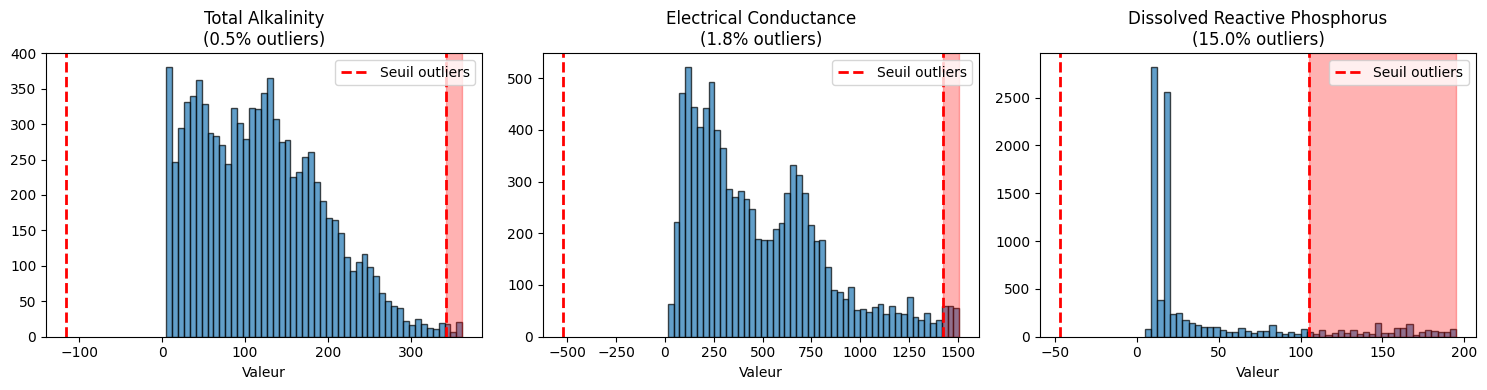

Zone rouge = outliers (au-delà des lignes rouges pointillées)


In [30]:
# 7.4 Visualisation : où sont les outliers ?

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    data = df[target].dropna()
    
    # Histogramme
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7)
    
    # Calculer les seuils
    result = detect_outliers_iqr(data)
    
    # Tracer les seuils (lignes rouges)
    ax.axvline(result['lower_bound'], color='red', linestyle='--', linewidth=2, label='Seuil outliers')
    ax.axvline(result['upper_bound'], color='red', linestyle='--', linewidth=2)
    
    # Zone des outliers en rouge clair
    ax.axvspan(result['upper_bound'], data.max(), alpha=0.3, color='red')
    if result['lower_bound'] > data.min():
        ax.axvspan(data.min(), result['lower_bound'], alpha=0.3, color='red')
    
    ax.set_title(f"{target}\n({result['pct']:.1f}% outliers)")
    ax.set_xlabel('Valeur')
    ax.legend()

plt.tight_layout()
plt.show()

print("Zone rouge = outliers (au-delà des lignes rouges pointillées)")

<cell_type>markdown</cell_type>### 7.5 Conclusion sur les outliers

**Résumé :**

| Variable | Outliers | Verdict |
|----------|----------|---------|
| Total Alkalinity | 0.5% | ✅ Acceptable |
| Electrical Conductance | 1.8% | ✅ Acceptable |
| **Dissolved Reactive Phosphorus** | **15%** | ⚠️ **Problématique** |
| swir22 | 2.2% | ✅ Acceptable |
| NDMI | 0.4% | ✅ Acceptable |
| MNDWI | 4.9% | ✅ Acceptable |
| pet | 2.1% | ✅ Acceptable |

**Le phosphore est la variable problématique** : 15% d'outliers, distribution très asymétrique.

**Options pour gérer les outliers du phosphore :**
1. **Les garder** : le modèle doit apprendre à prédire ces valeurs extrêmes
2. **Transformation log()** : réduire l'asymétrie et l'impact des outliers
3. **Modèle robuste** : utiliser un modèle moins sensible aux outliers (ex: Random Forest)

→ Pour l'instant, on garde les outliers et on verra les performances du modèle.

---

### 7.6 Interprétation physique des corrélations

**Pourquoi observe-t-on ces corrélations ?**

#### Total Alkalinity

| Corrélation | Explication physique |
|-------------|---------------------|
| **NDMI (-0.27)** | NDMI mesure l'humidité. Quand c'est **humide** (NDMI élevé) → plus d'eau → **dilution** des minéraux → alcalinité plus basse |
| **pet (+0.26)** | PET = évapotranspiration. Quand il fait **chaud/sec** (PET élevé) → l'eau s'évapore → les minéraux se **concentrent** → alcalinité plus élevée |

```
Climat sec (PET ↑)  →  Évaporation  →  Concentration minéraux  →  Alkalinity ↑
Climat humide       →  Dilution     →  Minéraux dilués         →  Alkalinity ↓
```

#### Electrical Conductance

| Corrélation | Explication physique |
|-------------|---------------------|
| **pet (+0.32)** ⭐ | Corrélation la plus forte ! Évaporation → concentration des **ions** → conductivité augmente. Logique : la conductivité mesure directement les ions dissous. |
| **NDMI (-0.18)** | Humidité élevée → dilution → moins d'ions par litre → conductivité plus basse |

```
PET élevé  →  Eau s'évapore  →  Ions se concentrent  →  Conductance ↑↑
```

#### Dissolved Reactive Phosphorus (corrélations faibles)

**Pourquoi le satellite ne "voit" pas le phosphore ?**

| Source de phosphore | Visible par satellite ? |
|--------------------|------------------------|
| Engrais agricoles (ruissellement) | ❌ Non |
| Eaux usées urbaines | ❌ Non |
| Décomposition organique | ❌ Non |
| Élevage (lisier) | ❌ Non |

Le phosphore vient de **sources humaines/biologiques** qui ne sont pas liées au climat ni visibles par satellite.

```
Ferme utilise engrais  →  Pluie  →  Ruissellement  →  Phosphore dans l'eau
        ↑
   Le satellite ne voit pas ça !
```

Le satellite peut voir les **conséquences** (algues vertes) mais pas la **cause** (apport de phosphore).

#### Schéma récapitulatif

```
                    Évaporation/Climat              Sources humaines
                          ↓                               ↓
                ┌─────────────────────┐          ┌───────────────┐
                │     Alkalinity      │          │   Phosphore   │
                │    Conductance      │          │               │
                └─────────────────────┘          └───────────────┘
                          ↓                               ↓
                  Visible par satellite           PAS visible directement
                          ↓                               ↓
                Corrélation MOYENNE (~0.3)       Corrélation FAIBLE (<0.1)
```

**Conclusion** : Le phosphore sera le plus difficile à prédire car sa source (activité humaine) n'est pas captée par les données satellite/climat.

---
## 8. Conclusions de l'EDA

### Ce qu'on a appris :

**Données :**
- Nombre de lignes : 9319 / 8234 sans NaN
- Nombre de sites : 162
- Période : 02.01.2011 à 31.12.2015

**Valeurs manquantes :**
- Colonnes concernées : MNDWI, swir22, swir16, green, nir, NDMI
- Pourcentage : 11% des lignes
- Décision prise : on supprime les lignes avec NaN pour l'instant et on cherchera plus tard à les remplir

**Distribution des targets :**

- Total Alkalinity : 
  - Moyenne: 119 mg/L, Médiane: 113 mg/L
  - Plage: 5 à 362 mg/L
  - Forme: Légèrement asymétrique à droite
  - Outliers: 0.5% (peu problématique)

- Electrical Conductance : 
  - Moyenne: 485 µS/cm, Médiane: 402 µS/cm
  - Plage: 15 à 1506 µS/cm
  - Forme: Asymétrique à droite (moyenne > médiane)
  - Outliers: 1.8% (acceptable)

- Dissolved Reactive Phosphorus : 
  - Moyenne: 44 µg/L, Médiane: 20 µg/L ⚠️
  - Plage: 5 à 195 µg/L
  - Forme: TRÈS asymétrique à droite (moyenne = 2x médiane)
  - Outliers: 15% (beaucoup!)

**Features les plus corrélées :**

- Total Alkalinity :
  - NDMI (-0.27) : corrélation négative modérée
  - pet (+0.26) : corrélation positive modérée
  
- Electrical Conductance :
  - pet (+0.32) : corrélation positive FORTE ⭐
  - NDMI (-0.18) : corrélation négative modérée

- Dissolved Reactive Phosphorus :
  - Toutes les corrélations sont FAIBLES (< 0.1) ⚠️
  - Le phosphore sera difficile à prédire avec ces features


**Problèmes identifiés :**

- Outliers (méthode IQR) :
  - Total Alkalinity : 43 outliers (0.5%) → acceptable
  - Electrical Conductance : 169 outliers (1.8%) → acceptable  
  - Dissolved Reactive Phosphorus : 1398 outliers (15%) → PROBLÉMATIQUE ⚠️

- Autres :
  - Le phosphore a une distribution très asymétrique
  - Les features ont peu d'outliers (<5%)

---

### Prochaine étape :
→ Notebook 02 : Feature Engineering

[⬆️ Retour au sommaire](#sommaire)